Compares model nowcasts to VENUS temperature and salinity data. Data is from the East and Central nodes.

In [1]:
import matplotlib.pyplot as plt
from salishsea_tools.nowcast import analyze
from salishsea_tools.nowcast import figures
from salishsea_tools.nowcast import research_VENUS
from salishsea_tools import tidetools
import datetime
from dateutil import tz
import numpy as np
import netCDF4 as nc
import matplotlib

%matplotlib inline

In [2]:

grid_B=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy, X, Y = tidetools.get_bathy_data(grid_B)


In [3]:
T = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/01feb15/SalishSea_1d_20150201_20150201_grid_T.nc')
model_depths = T.variables['deptht'][:]



In [4]:
def truncate(data, t_o,t_f):
    sdt=t_o.replace(tzinfo=tz.tzutc()); edt=t_f.replace(tzinfo=tz.tzutc())
    data_trun = data[(data.date< edt) & (data.date >sdt)]
    return data_trun

In [5]:
data= research_VENUS.load_VENUS('East')

In [6]:
data[['sal','temp']]=data[['sal','temp']].astype(float)


In [7]:
t_o=datetime.datetime(2014,11,11); t_f = datetime.datetime(2015,8,27)
sdt=t_o.replace(tzinfo=tz.tzutc()); edt=t_f.replace(tzinfo=tz.tzutc())
data_trun =truncate(data ,sdt,edt)

In [8]:
def compare_temp_sal_timeseries(station,figsize=(15,8)):
    data= research_VENUS.load_VENUS(station)
    lon = research_VENUS.SITES['VENUS'][station]['lon']
    lat = research_VENUS.SITES['VENUS'][station]['lat']
    depth = research_VENUS.SITES['VENUS'][station]['depth']
    data[['sal','temp']]=data[['sal','temp']].astype(float)
    data_trun = truncate(data,t_o,t_f)
    
    k = tidetools.find_model_level(depth,model_depths)
    print model_depths[k], depth
    
    [j,i] = tidetools.find_closest_model_point(lon,lat,X,Y,bathy)

    sal, time = analyze.combine_files(fnames,'vosaline',k,j,i) #consider interpolating ?
    temp, time = analyze.combine_files(fnames,'votemper',k,j,i) #consider interpolating ?
    
    fig,axs= plt.subplots(2,1,figsize=figsize)
    ax=axs[0]
    ax.plot(time,sal,label='model')
    ax.plot(data.date[:],data.sal[:],'-',label='obs')
    ax.set_xlim([t_o,t_f])
    ax.legend(loc=0)
    ax.set_title('Salinity comparison -  VENUS {}'.format(station))
    ax.set_ylabel('Salinty [PSU]')
    print 'Observed Salinity: Mean {}, std {}'.format(data_trun.sal.mean(), data_trun.sal.std())    
    print 'Modelled Salinity: Mean {}, std {}'.format(np.mean(sal), np.std(sal))
    ax.grid()
    
    ax=axs[1]
    ax.plot(time,temp,label='model')
    ax.plot(data.date[:],data.temp[:],'-',label='obs')
    ax.set_xlim([t_o,t_f])
    ax.legend(loc=0)
    ax.set_title('Temp. comparison - VENUS {}'.format(station))
    ax.set_ylabel('Temperature (deg C)')
    print 'Observed Temperature: Mean {}, std {}'.format(data_trun.temp.mean(), data_trun.temp.std())    
    print 'Modelled Temperature: Mean {}, std {}'.format(np.mean(temp), np.std(temp))  
    ax.grid()
    
    
    return fig

In [9]:
font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

# Nowcasts

In [10]:
fnames = analyze.get_filenames(t_o, t_f, '1h', 'grid_T', '/data/dlatorne/MEOPAR/SalishSea/nowcast/')

306.834 300
Observed Salinity: Mean 31.0794133372, std 0.107964905573
Modelled Salinity: Mean 30.5136489868, std 0.112243667245
Observed Temperature: Mean 9.3035834304, std 0.168183510864
Modelled Temperature: Mean 9.72117424011, std 0.11131696403


/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


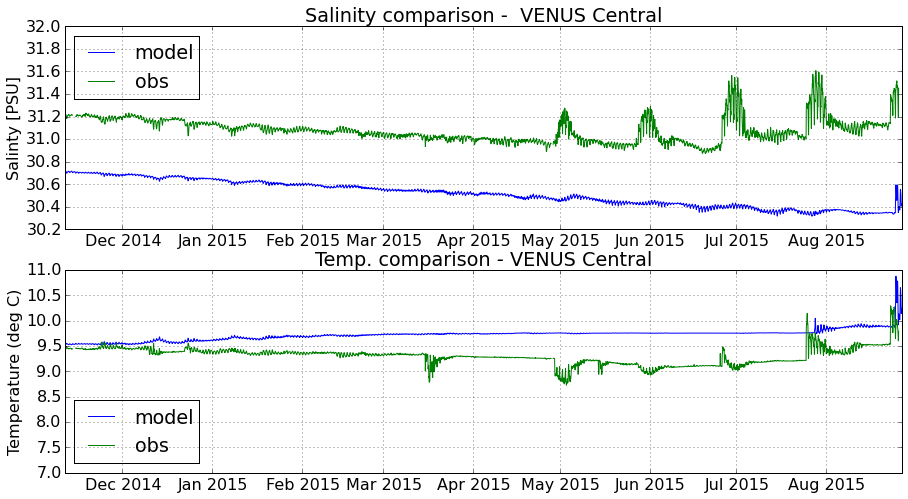

In [11]:

fig = compare_temp_sal_timeseries('Central')

173.114 170
Observed Salinity: Mean 30.6470884386, std 0.321821757138
Modelled Salinity: Mean 30.2244491577, std 0.190025866032
Observed Temperature: Mean 9.43946490922, std 0.485685057497
Modelled Temperature: Mean 9.92326831818, std 0.357013881207


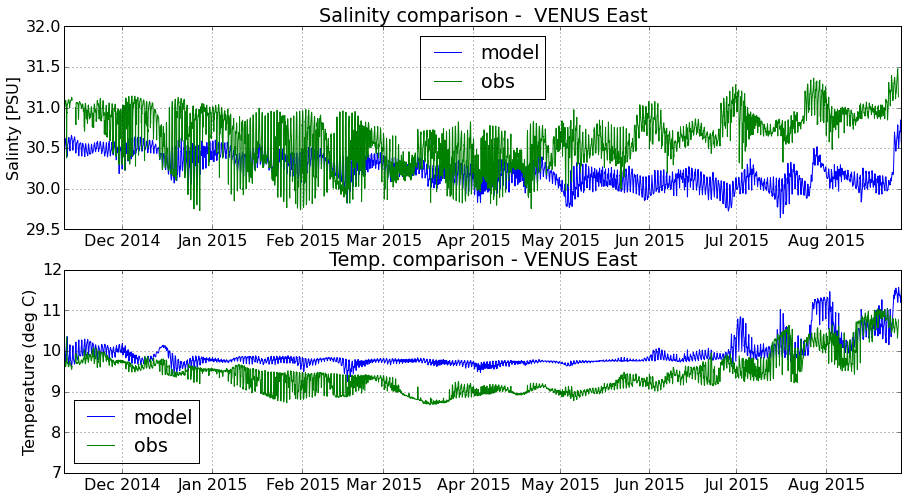

In [12]:
fig = compare_temp_sal_timeseries('East')

* I think we may have had multiple sims for a single day in early November. Just ignore that.
* Interpolate model to correct depth?

# Spin ups

Duh, no VENUS results in 2003...

Still nice to see the time series. Good to know this function applies to more than just the nowcasts.

In [13]:
t_o=datetime.datetime(2003,1,1); t_f = datetime.datetime(2003,12,31)


fnames = analyze.get_filenames(t_o, t_f, '1d', 'grid_T', '/ocean/dlatorne/MEOPAR/SalishSea/results/spin-up/')

306.834 300
Observed Salinity: Mean nan, std nan
Modelled Salinity: Mean 30.8734378815, std 0.0777241364121
Observed Temperature: Mean nan, std nan
Modelled Temperature: Mean 9.5296163559, std 0.284815847874


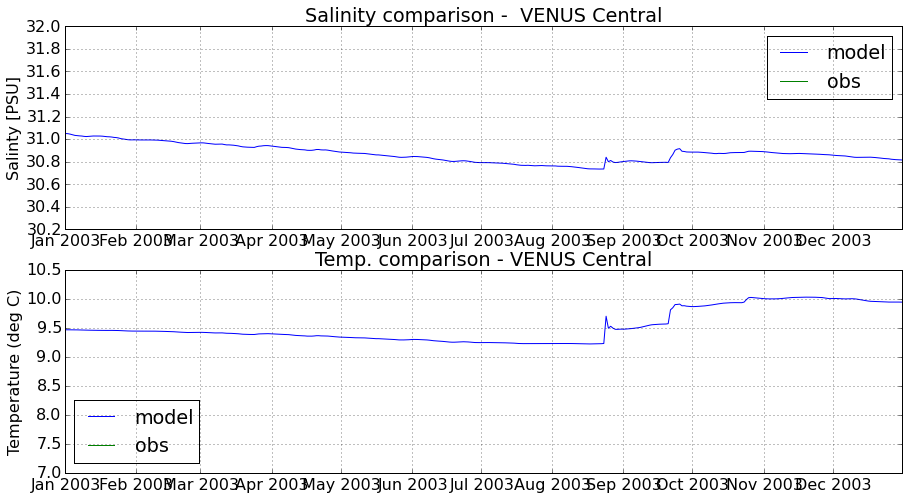

In [14]:
fig = compare_temp_sal_timeseries('Central')

173.114 170
Observed Salinity: Mean nan, std nan
Modelled Salinity: Mean 30.6087989807, std 0.111248604953
Observed Temperature: Mean nan, std nan
Modelled Temperature: Mean 9.40323352814, std 0.588051080704


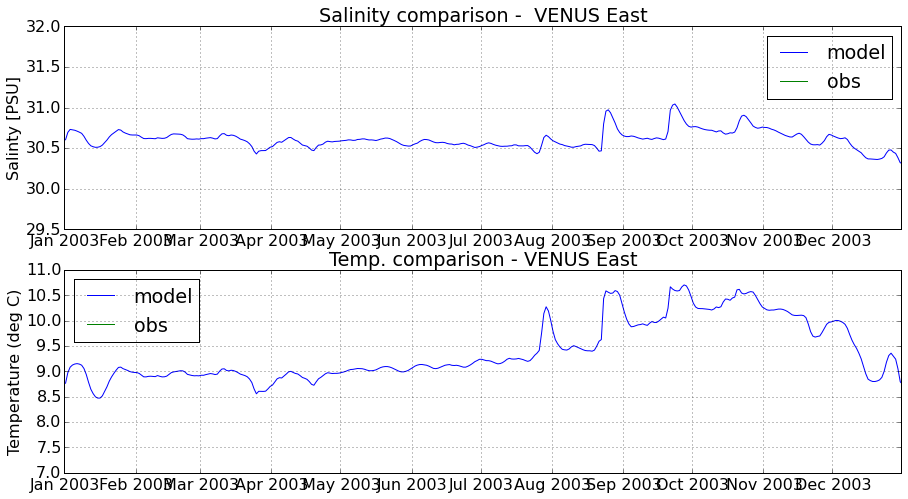

In [15]:
fig = compare_temp_sal_timeseries('East')

# Spectrum

In [15]:
t_o=datetime.datetime(2014,11,10); t_f = datetime.datetime(2015,3,9)
fnames = analyze.get_filenames(t_o, t_f, '1h', 'grid_T', '/data/dlatorne/MEOPAR/SalishSea/nowcast/')

In [16]:
station = 'East'
data= research_VENUS.load_VENUS(station)
lon = research_VENUS.SITES['VENUS'][station]['lon']
lat = research_VENUS.SITES['VENUS'][station]['lat']
depth = research_VENUS.SITES['VENUS'][station]['depth']
    
k = tidetools.find_model_level(depth,model_depths)
print model_depths[k], depth
    
[j,i] = tidetools.find_closest_model_point(lon,lat,X,Y,bathy)

sal, time = analyze.combine_files(fnames,'vosaline',k,j,i) #consider interpolating ?
temp, time = analyze.combine_files(fnames,'votemper',k,j,i) #consider interpolating ?

173.114 170


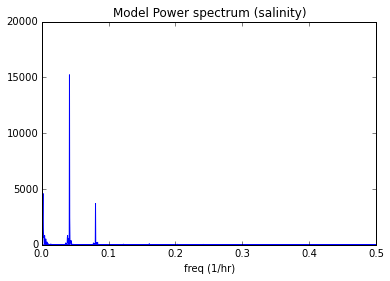

In [17]:
fig,ax=plt.subplots(1,1)

# model
ps = np.abs(np.fft.fft((sal)))**2
freqs = np.fft.fftfreq(sal.size, 1)
ax.plot(freqs,ps)
ax.set_ylim([0,2*10**4])
ax.set_xlim([0,.5])
ax.set_xlabel('freq (1/hr)')
ax.set_title('Model Power spectrum (salinity)')

* Strong signals at about 0.04 (1/24) and 0.08 (1/12) 
* Tidal frequencies
* Hard to do the fft on VENUS data because it contains NaNs. Will tackle this later..